In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
train_dataset = torchvision.datasets.CIFAR10(root='.',
                                                train=True,
                                                transform=transforms.ToTensor(),
                                                download=True)

test_dataset = torchvision.datasets.CIFAR10(root='.',
                                                train=False,
                                                transform=transforms.ToTensor(),
                                                download=True)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [11]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [12]:
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [13]:
K = len(set(train_dataset.targets))
print("number of classes:", K)

number of classes: 10


In [14]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [15]:
temp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                            batch_size=1,
                                            shuffle=True)

for x, y in temp_loader:
    print(x)
    print(x.shape)
    break

tensor([[[[0.2314, 0.1765, 0.2353,  ..., 0.1804, 0.2235, 0.2549],
          [0.1725, 0.1765, 0.2667,  ..., 0.2000, 0.2157, 0.2235],
          [0.1020, 0.1882, 0.2941,  ..., 0.2353, 0.2196, 0.2157],
          ...,
          [0.4431, 0.4157, 0.4039,  ..., 0.3647, 0.4039, 0.4353],
          [0.4431, 0.4314, 0.4275,  ..., 0.2784, 0.3843, 0.4314],
          [0.4235, 0.4275, 0.4196,  ..., 0.2902, 0.3490, 0.4118]],

         [[0.3412, 0.2784, 0.3020,  ..., 0.2863, 0.3137, 0.3216],
          [0.2745, 0.2784, 0.3294,  ..., 0.3020, 0.3059, 0.2941],
          [0.1882, 0.2784, 0.3569,  ..., 0.3255, 0.3020, 0.2863],
          ...,
          [0.5216, 0.4941, 0.4824,  ..., 0.4196, 0.4549, 0.4824],
          [0.5059, 0.4980, 0.4941,  ..., 0.3098, 0.4275, 0.4824],
          [0.4824, 0.4902, 0.4784,  ..., 0.3137, 0.3922, 0.4588]],

         [[0.1843, 0.1451, 0.2235,  ..., 0.1529, 0.1804, 0.1843],
          [0.1451, 0.1451, 0.2314,  ..., 0.1804, 0.1804, 0.1647],
          [0.0863, 0.1529, 0.2510,  ..., 0

In [16]:
class CNN(nn.Module):
    def __init__(self, K):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

        self.fc1 = nn.Linear(128*3*3, 1024)
        self.fc2 = nn.Linear(1024, K)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        x = x.view(-1, 128*3*3)
        x = F.dropout(x, p=0.5)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.2)
        x = self.fc2(x)
        return x

In [17]:
model = CNN(K)

In [18]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [19]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [20]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)

    for it in range(epochs):
        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())

        train_loss = np.mean(train_loss)

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        train_losses[it] = train_loss
        test_losses[it] = test_loss

        dt = datetime.now() - t0
        print(
            f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Duration: {dt}')

    return train_losses, test_losses

In [21]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch 1/15, Train Loss: 1.6986, Test Loss: 1.4750, Duration: 0:00:22.593787
Epoch 2/15, Train Loss: 1.4118, Test Loss: 1.3249, Duration: 0:00:21.944767
Epoch 3/15, Train Loss: 1.2864, Test Loss: 1.2774, Duration: 0:00:22.489025
Epoch 4/15, Train Loss: 1.2002, Test Loss: 1.2098, Duration: 0:00:22.306000
Epoch 5/15, Train Loss: 1.1327, Test Loss: 1.1339, Duration: 0:00:22.179355
Epoch 6/15, Train Loss: 1.0770, Test Loss: 1.1165, Duration: 0:00:22.072999
Epoch 7/15, Train Loss: 1.0265, Test Loss: 1.0945, Duration: 0:00:22.259999
Epoch 8/15, Train Loss: 0.9831, Test Loss: 1.0849, Duration: 0:00:22.207112
Epoch 9/15, Train Loss: 0.9416, Test Loss: 1.1003, Duration: 0:00:21.863451
Epoch 10/15, Train Loss: 0.9087, Test Loss: 1.0475, Duration: 0:00:22.620475
Epoch 11/15, Train Loss: 0.8746, Test Loss: 1.0407, Duration: 0:00:21.713485
Epoch 12/15, Train Loss: 0.8441, Test Loss: 1.0291, Duration: 0:00:22.051871
Epoch 13/15, Train Loss: 0.8106, Test Loss: 1.0336, Duration: 0:00:22.801381
Epoch 14

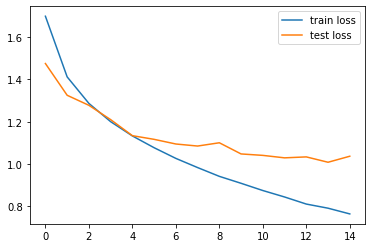

In [22]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [23]:
model.eval()
n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

train_acc = n_correct/n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct/n_total
print(f'Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}')

Train acc: 0.7433, Test acc: 0.6504


In [24]:
import sklearn.metrics as confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[678  19  98  22  22   5  18   8 108  22]
 [ 34 781  19  12   6   9  18   5  40  76]
 [ 58   8 599  55  94  51  74  32  22   7]
 [ 20   8 125 426  67 202  88  32  20  12]
 [ 29   7 140  59 576  35  76  63  12   3]
 [ 12   5 117 173  71 503  46  59  12   2]
 [  6   3  67  61  49  25 767   9   9   4]
 [ 27   7  57  46  83  62  15 688   6   9]
 [ 89  25  39  20  10   7   9   4 786  11]
 [ 60 132  29  30  11   9  20  26  61 622]]


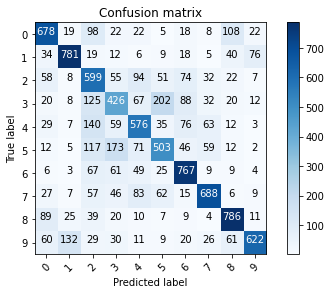

In [27]:
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    outputs = model(inputs)
    _, predictions = torch.max(outputs, 1)
    p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix.confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [28]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

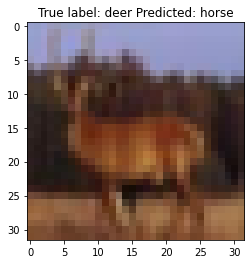

In [50]:
p_test = p_test.astype(np.uint8)
missclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(32,32,3))
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));